# CNN implementation as mentioned in "A deep learning approach for person identification using ear biometrics" paper

### Link to paper: https://doi.org/10.1007/s10489-020-01995-8

In [1]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.utils import image_dataset_from_directory

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, BatchNormalization as BN, Dense, Rescaling
from tensorflow.keras.models import Sequential


ROOT_DIR = os.getcwd()
weights_saved = True # Set it to False if training for the first time and weights are not available for loading

## IITD Dataset

In [2]:
batch_size = 32
img_height, img_width = 180, 50
epochs = 100

In [3]:
train_ds, test_ds = image_dataset_from_directory(
    os.path.join(os.getcwd(), 'IITD'),
    label_mode='categorical',
    validation_split=0.3,
    subset='both',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1586 files belonging to 221 classes.
Using 1111 files for training.
Using 475 files for validation.


tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.], shape=(221,), dtype=float32)


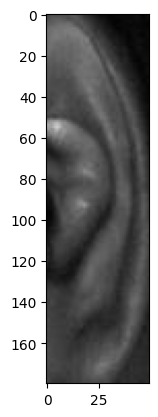

In [4]:
for data, lbl in train_ds.take(1):
    plt.imshow(np.uint64(data[0]))
    print(lbl[0])

In [5]:
def build_IITD_model():
    model = Sequential()

    # Convolution Layer 1
    model.add(Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)))
    model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Convolution Layer 2
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='tanh'))
    model.add(BN())
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Convolution Layer 3
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Convolution Layer 4
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='tanh'))
    model.add(BN())
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Convolution Layer 5
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Convolution Layer 6
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='tanh'))
    model.add(BN())

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(221, activation='softmax'))

    rmsProp = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    model.compile(optimizer=rmsProp, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = build_IITD_model()

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 50, 3)        0         
                                                                 
 conv2d (Conv2D)             (None, 180, 50, 8)        224       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 25, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 25, 16)        1168      
                                                                 
 batch_normalization (BatchN  (None, 90, 25, 16)       64        
 ormalization)                                                   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 12, 16)       0

In [7]:
os.chdir(ROOT_DIR)
checkpoint_path = "checkpoints/IITD_checkpoint/"
    
if weights_saved == True:
    # Loads the weights that we saved previously
    model.load_weights(checkpoint_path)
else:
    # Need this to generate weights for the first time
    model.fit(train_ds, epochs=epochs)  # Pass callback to training
    model.save_weights(checkpoint_path)

In [8]:
# Re-evaluate the model
loss, acc = model.evaluate(test_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

15/15 - 2s - loss: 0.1652 - accuracy: 0.9684 - 2s/epoch - 155ms/step
Restored model, accuracy: 96.84%


In [9]:
model.evaluate(test_ds)

15/15 [==============================] - 2s 113ms/step - loss: 0.1652 - accuracy: 0.9684


[0.1651676893234253, 0.9684210419654846]

## AMI Dataset

In [10]:
batch_size = 32
img_height, img_width = 176, 123
epochs = 100

In [11]:
os.chdir(ROOT_DIR)
train_ds, test_ds = image_dataset_from_directory(
    os.path.join(os.getcwd(), 'AMI'),
    label_mode='categorical',
    validation_split=0.3,
    subset='both',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 1348 files belonging to 100 classes.
Using 944 files for training.
Using 404 files for validation.


tf.Tensor(
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.], shape=(100,), dtype=float32)


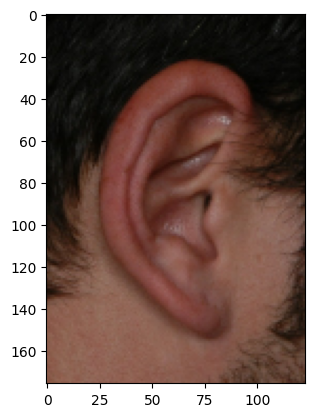

In [12]:
for data, lbl in train_ds.take(1):
    plt.imshow(np.uint64(data[0]))
    print(lbl[0])

In [13]:
def build_AMI_model():
    model = Sequential()

    # Convolution Layer 1
    model.add(Rescaling(scale=1./255, input_shape=(img_height, img_width, 3)))
    model.add(Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Convolution Layer 2
    model.add(Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='tanh'))
    model.add(BN())
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Convolution Layer 3
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Convolution Layer 4
    model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='tanh'))
    model.add(BN())
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Convolution Layer 5
    model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='tanh'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Convolution Layer 6
    model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='tanh'))
    model.add(BN())

    # Fully Connected Layer
    model.add(Flatten())
    model.add(Dense(100, activation='softmax'))
    
    rmsProp = tf.keras.optimizers.RMSprop(learning_rate=0.001)
    model.compile(optimizer=rmsProp, loss='categorical_crossentropy', metrics=['accuracy'])

    return model

model = build_AMI_model()

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 176, 123, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (None, 176, 123, 8)       224       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 88, 61, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 88, 61, 16)        1168      
                                                                 
 batch_normalization_3 (Batc  (None, 88, 61, 16)       64        
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 44, 30, 16)      

In [15]:
os.chdir(ROOT_DIR)
checkpoint_path = "checkpoints/AMI_checkpoint/"
    
if weights_saved == True:
    # Loads the weights that we saved previously
    model.load_weights(checkpoint_path)
else:
    # Need this to generate weights for the first time
    model.fit(train_ds, epochs=epochs)  # Pass callback to training
    model.save_weights(checkpoint_path)

In [16]:
# Re-evaluate the model
loss, acc = model.evaluate(test_ds, verbose=2)
print("Restored model, accuracy: {:5.2f}%".format(100 * acc))

13/13 - 5s - loss: 0.6147 - accuracy: 0.9109 - 5s/epoch - 380ms/step
Restored model, accuracy: 91.09%


In [17]:
model.evaluate(test_ds)

13/13 [==============================] - 5s 368ms/step - loss: 0.6147 - accuracy: 0.9109


[0.6147071719169617, 0.9108911156654358]

## Testing adversarial attack using stickers

In [35]:
# # importing PIL
# from PIL import Image

# os.chdir(ROOT_DIR)
# os.chdir('adversarial_images')
# # os.getcwd()

# imgs, labels = [], []
# for file in os.listdir():
#     file_name = file.split('_')
#     # print(file_name)
    
#     # Adversarial patch image
#     img_data = tf.keras.utils.load_img('_'.join(file_name), target_size=(img_height, img_width), keep_aspect_ratio=True)

#     # Clean Image
#     # img_data = tf.keras.utils.load_img('000_zoom_ear.jpg', target_size=(img_height, img_width))
#     # img_data = tf.keras.utils.load_img('000_zoom_ear_rot.jpg', target_size=(img_height, img_width))

#     array = tf.keras.utils.img_to_array(img_data)
#     img = np.expand_dims(img_data, axis = 0)
#     # plt.imshow(img[0])
#     # plt.axis('off')
#     # plt.title(file_name[0])
#     # plt.show()
#     imgs.append(img)
#     labels.append(file_name[0])

# # np.array(imgs).shape

# preds = []
# for img in imgs:
#     pred = model.predict(img).argmax()
# #     pred.argmax()
#     preds.append(pred)

# for img, label, pred in zip(imgs, labels, preds):
#     plt.imshow(img[0])
#     plt.axis('off')
#     plt.title(f'True: {int(label)}, Pred: {pred}')
#     plt.show()


## Create an adversarial patch here using own code

# Understand how a patch is created................... :(